# Import all packages
Import all your packages to succesfully us python, json files, sql data tables and creation of visualizations


In [1]:
#Import all packages for the Yelp Project
#Create connection to connection to created database

import json
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
conn = sqlite3.connect('yelp.db')

import keys 
import functions 

#:memory:
cur = conn.cursor()

 # Create two variables for the business and review databases from yelp
 
 We need to two variables called url and url1 to requesto the API for businesses and their reviews. Once you
 have your connections to the API's, a key is needed to be created in order to access the Yelp API data.

In [7]:
url = 'https://api.yelp.com/v3/businesses/search'
url2 = 'https://api.yelp.com/v3/businesses/{id}/reviews'

In [8]:
client_id = "WdeBQ0QfW7ctlNNGDyNEwA"
api_key = "qOP1w_dBiefuyHCkz5gzIlhtKzNxBNMi3uCVJib_Kzs_y0EKqn1pKpRlpGvAPmB2fZ_eVWv65j_o5rmiT9HNK10tH5rosM3GfauVdQU0TvfOtdqn4L3zzLC2g1P3X3Yx"

# Creates a header with the attached API key from the Yelp API

In [50]:
functions.headers;

Creates the conditiions for which we want to search for for a specific business.
Our conditons for this client is business by Yoga business within Manahttan for a 10,000 meter radius or 6.4 miles. Then import all the condtions into the the url paramters.

In [49]:
term = 'yoga'
location = 'Manhattan'
radius = 10000

url_params = {
                "term": term.replace(' ', '+'),
                "location": location.replace(' ', '+'),
                "radius" : radius,
                "limit": 50
            }

# Creating SQL Tables

Create a SQL datatable were we will insert the information from the businesses returned from the API. We also need to create a table for three reviews given to each business returned from the API.

In [22]:

cur.execute("""CREATE TABLE businesses (
                                id INTEGER PRIMARY KEY, 
                                businessID TEXT,
                                rating INTEGER,
                                price TEXT,
                                name TEXT,
                                review_count TEXT,
                                city TEXT,
                                country TEXT,
                                zip_code TEXT
                                )          
            """)
conn.commit()

OperationalError: table businesses already exists

In [23]:
cur.execute("""CREATE TABLE reviews (
                                businessID TEXT,
                                text TEXT,
                                rating INTEGER,
                                time_created TEXT,
                                reviewID TEXT
                                )          
            """)
conn.commit()

OperationalError: table reviews already exists

# Creating functions and calling functions

1. Creates a yelp call function that takes into three different paramters:
2. Creating a function that parses that data then returns the information as a tuple.
3. Takes the values from the parsed results and inputs them into the business table

In [53]:
functions.yelp_call;
functions.parse_results;
functions.insert_values;

Using the three distinct functions we created to grab our data, we now grab 50 businesses at a time and at them to our dataframe and tables for our businesses database

In [26]:
# create a variable  to keep track of which result you are in. 
current_offset = 0
#set up a while loop to go through and grab the result 
while current_offset < 1000:
    #set the offset parameter to be where you currently are in the results 
    url_params['offset'] = current_offset
    #make your API call with the new offset number
    results = functions.yelp_call(url, url_params, api_key)
    #after you get your results you can now use your function to parse those results
    parsed_results = functions.parse_results(results)
    # use your function to insert your parsed results into the db
    functions.insert_values(conn, cur, parsed_results)
    #increment the counter by 50 to move on to the next results
    current_offset += 50
    print(current_offset)

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000


# London location:

We have considered NYC as option but we now want compare the results from London in terms of the yoga studios present there. Adding this a new condtion we set our new paramters for the different location, then pass it through our define functions to grab all the businesses related yoga in London. 

In [27]:
location = 'London'

url_params = {
                "term": term.replace(' ', '+'),
                "location": location.replace(' ', '+'),
                "radius" : radius,
                "limit": 50
            }

In [29]:
# create a variable  to keep track of which result you are in. 
current_offset = 0
#num = NYCdata['total']
#set up a while loop to go through and grab the result 
while current_offset < 1000:
    #set the offset parameter to be where you currently are in the results 
    url_params['offset'] = current_offset
    #make your API call with the new offset number
    results = functions.yelp_call(url, url_params, api_key)
    
    #after you get your results you can now use your function to parse those results
    parsed_results = functions.parse_results(results)
    
    # use your function to insert your parsed results into the db
    functions.insert_values(conn, cur, parsed_results)
    #increment the counter by 50 businesses at a time to move on to the next results
    print(current_offset)
    current_offset += 50

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


# Grab all our businesses IDs

- We first need grab all the businesses ID's that are unique to each business that is saved as a tuple.
- Then we need put all our business ID's in a list so then we can grab just one ID later one. 


In [30]:
biz_list = cur.execute("""
SELECT businessID
FROM businesses;
""").fetchall()

biz_list;

biz_ID_list = []
for biz in biz_list:
    biz_ID = biz[0]
    biz_ID_list.append(biz_ID)
biz_ID_list

# Create our reviews functions

Just like for our businesses and the crucial information that leads to our analysis, we want to take the reviews for each business for later use of analysis.

1. Creata function that takes each unique businesses ID and grabs just the reviews to then put into a dataframe.
2. Then we need to parse the information that is given from our reviews dataframe.
3. With the data know organized and pull, we then insert into our SQL Table to run our queries.

In [55]:
functions.yelp_call_reviews;
functions.parse_reviews;
functions.insert_reviews;

# Grabbing all the reviews

For each unqiue business ID we input this into the Yelp API reviews search, if we have no reviews for that business then we pass for the business. We grab the specific information that we need from the reviews database to then insert into our SQL table for each business.

In [56]:
#Goes into each business ID and puts into the yelp_call to grab reviews assocated with one 
#specific business
for biz in biz_ID_list:
    review_results = functions.yelp_call_reviews(biz)
    #If we get a Nan or None value we then move onto the next one 
    if review_results == None:
        pass
    #Takes all the results we got from reviews and then parses them into the tuple
    parsed_reviews = functions.parse_reviews(biz, review_results)
    #takes the tuple and inserts the information into the table called reviews 
    functions.insert_reviews(conn, cur, parsed_reviews)

TypeError: argument of type 'NoneType' is not iterable

# Import both databases in dataframes to then create visualizations for later use

In [41]:
#Checking that we have a SQL database for all the businesses in NYC and London
cur.execute("""
SELECT * FROM businesses
""")
business = pd.DataFrame(cur.fetchall())
business.columns = [x[0] for x in cur.description]
business

,id,businessID,rating,price,name,review_count,city,country,zip_code
0,1,kmj7FnZsKPPH3psbR9tX7Q,4.5,None,Sonic Yoga,146,New York,US,10019
1,2,GgvXfu8U80tcrxythjpB4w,5.0,None,AtthenaYoga,42,New York,US,10036
2,3,TlDcvf1cEK2im6e4AFYe3A,4.5,None,Humming Puppy,90,New York,US,10011
3,4,npgq_up0_puDV5jieUza-A,4.5,None,Yo Yoga!,55,New York,US,10022
4,5,Oi85AYz9-Bx-9SBjNf__vg,4.5,None,Yoga Spa Lounge 1881,92,New York,US,10022
...,...,...,...,...,...,...,...,...,...
3353,3354,XCOdN4pGetfR8Ema258z3w,2.5,None,DW FITNESS,7,London,GB,WC2B 4DD
3354,3355,Q-nSJQDBRyn9Ahqc4oRlRg,3.5,None,Fitness First Broadgate,3,London,GB,EC2M 7PY
3355,3356,MEUESxTbldQnKrU7_9g4Yw,4.0,None,Mettá,1,London,GB,NW5 1NA
3356,3357,zI399ArMHUW9uDNkTciDPA,3.5,None,Virgin Active,9,London,GB,SW4 0HG


In [37]:
#Checks to see if all the values where populated into the reviews database
cur.execute("""
SELECT * FROM reviews
""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df

,businessID,text,rating,time_created,reviewID
0,kmj7FnZsKPPH3psbR9tX7Q,"Beginner Flow with Taquice, Sunday afternoon -...",5,2019-12-29 14:26:23,QJS08cT1I7c0Ev9u6femLw
1,kmj7FnZsKPPH3psbR9tX7Q,"Beginner Flow with Taquice, Sunday afternoon -...",5,2019-12-29 14:26:23,QJS08cT1I7c0Ev9u6femLw
2,kmj7FnZsKPPH3psbR9tX7Q,"Beginner Flow with Taquice, Sunday afternoon -...",5,2019-12-29 14:26:23,QJS08cT1I7c0Ev9u6femLw
3,kmj7FnZsKPPH3psbR9tX7Q,I came across Sonic Yoga on ClassPass. I have...,4,2020-02-28 06:21:41,1lBvdI7kfUrWN59njKQsZw
4,kmj7FnZsKPPH3psbR9tX7Q,I came across Sonic Yoga on ClassPass. I have...,4,2020-02-28 06:21:41,1lBvdI7kfUrWN59njKQsZw
...,...,...,...,...,...
9322,s0W-AbYi0mGw6egZ2rk_Ow,This location puts San Francisco Equinox Sport...,4,2016-08-01 12:34:31,1s1M_DJNdqHvEg2xLHChYQ
9323,s0W-AbYi0mGw6egZ2rk_Ow,This location puts San Francisco Equinox Sport...,4,2016-08-01 12:34:31,1s1M_DJNdqHvEg2xLHChYQ
9324,s0W-AbYi0mGw6egZ2rk_Ow,My father's old business partner's daughter in...,3,2018-08-08 08:30:27,sJdmd9ZYZf-BJ4SNKI-iVw
9325,s0W-AbYi0mGw6egZ2rk_Ow,My father's old business partner's daughter in...,3,2018-08-08 08:30:27,sJdmd9ZYZf-BJ4SNKI-iVw


# SQL Queries

We need to do some basic analysis about our business based on their location. 
As we see that we want to pull out the top businesses based on their review counts, 
ratings, locations, and what users had to say about each business. 

In [26]:
#SQL queries 
# Which are the 5 most reviewed businesses?
cur.execute("""
SELECT name 
FROM businesses
ORDER By review_count DESC
LIMIT 5
""").fetchall()

[('Vanderbilt Branch YMCA',),
 ('Vanderbilt Branch YMCA',),
 ('Work it Out',),
 ('Foxy Fitness & Pole Training Studios',),
 ('Church Street Boxing Gym',)]

In [27]:
#What is the highest rating recieved in your data set and how many businesses have that rating?
cur.execute("""
SELECT rating, COUNT(rating)
FROM businesses
WHERE rating = (SELECT MAX(rating) FROM businesses)
""").fetchall()

[(5, 1008)]

In [28]:
# What percentage of businesses have a rating greater than or 4.5?
cur.execute("""
SELECT
COUNT(*)*100/ (SELECT COUNT(*) FROM businesses)
FROM businesses 
WHERE rating < 4.5
""").fetchall()

[(30,)]

In [29]:
# What percentage of businesses have a rating less than 3?
cur.execute("""
SELECT
COUNT(*)*100/ (SELECT COUNT(*) FROM businesses)
FROM businesses 
WHERE rating < 3
""").fetchall()

[(3,)]

In [30]:
# What is the average rating of businesses that have a price label of one dollar sign? 
# Two dollar signs? Three dollar signs?
cur.execute("""
SELECT AVG(rating) AS AvgRating, price
FROM businesses
GROUP BY price
HAVING price = '$' OR price = '$$' OR price = '$$$'
""").fetchall()

[(4.25, '$'), (4.1923076923076925, '$$'), (3.4516129032258065, '$$$')]

In [31]:
#Return the text of the reviews for the most reviewed business.
cur.execute("""
SELECT text
FROM reviews
WHERE businessID in (SELECT businessID
                     FROM businesses
                     ORDER BY review_count
                     LIMIT 1
                     );
""").fetchall()

[('I came away very impressed after some session stress management and yoga sessions with Eiji. His calm demeanor and clear instructions made it a very easy to...',),
 ('I came away very impressed after some session stress management and yoga sessions with Eiji. His calm demeanor and clear instructions made it a very easy to...',),
 ('I came away very impressed after some session stress management and yoga sessions with Eiji. His calm demeanor and clear instructions made it a very easy to...',)]

In [32]:
# Return the name of the business with the most recent review.
cur.execute("""
SELECT name
FROM businesses
WHERE businessID in (SELECT businessID
                     FROM reviews
                     ORDER BY time_created DESC
                     LIMIT 1);

""").fetchall()

[('Five Pillars Yoga',), ('Five Pillars Yoga',)]

In [33]:
# Find the highest rated business and return text of the most recent review. 
# If multiple business have the same rating, select the business with the most reviews.
cur.execute("""
SELECT text
FROM reviews AS r
JOIN businesses AS b
ON r.businessID = b.businessID
ORDER BY review_count DESC, b.rating DESC
LIMIT 1
""").fetchall()

[('I was member here for 15+ years. The karate program was pretty good, most of the staff is great (with the exception to a few people), the gym is nice and...',)]

In [34]:
# Find the lowest rated business and return text of the most recent review. 
# If multiple business have the same rating, select the business with the least reviews.
cur.execute("""
SELECT text
FROM reviews AS r
JOIN businesses AS b
ON r.businessID = b.businessID
ORDER BY  b.rating ASC, review_count ASC
LIMIT 1
""").fetchall()

[('Participated in a photo shoot for this studio way back in 2018, and was promised TFP not long after. 2 years and multiple failed contact attempts later,...',)]

# Creating Visualizations to clear represent what location is better fit for a yoga studio.

1. The first visual is comparing average rating in comparison to NYC and London.
2. Second visual is the average rating based on review counts for each location. 
    - We see that our amount of data varies greatly due to which location used Yelp to store business information
3. Third visual shows the difference of cost to attend a yoga studio based on which location you are going. 
    - London yoga studios are more expensive, potentially due to cost of living in London.
4. Our final visual shows the ratings given based on the zip code of our two locations. 
    - We specifically went into Brooklyn and Central London zip codes beacuse more people are moving to these locations in each city.

In [55]:
#Creating a datframe based on the businesses where we get the rating and city where we 
#group by the country

Avg_Country = cur.execute("""
SELECT rating, city
FROM businesses
GROUP BY country 
""").fetchall()

In [56]:
#Creates dataframe for the country and the average rating by country
Avg_Country = df.groupby('country')['rating'].mean()

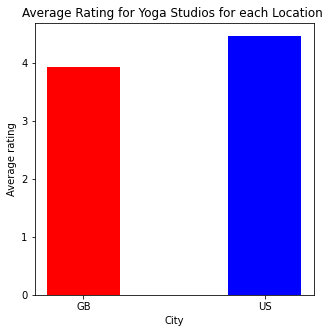

In [57]:
#Creates a visualization based on the average rating for eacb location 

fig, ax = plt.subplots(figsize=(5, 5))

ax.bar(Avg_Country.index, Avg_Country.values, color = ('Red', 'blue'), width = 0.4)

ax.set_xlabel("City")
ax.set_ylabel("Average rating")
ax.set_title("Average Rating for Yoga Studios for each Location ")
plt.show()

In [81]:
#SQL query grabbing the rating and review_count for each city 
cur.execute("""
SELECT city, rating, review_count
FROM businesses
GROUP BY country
""")
avgR = pd.DataFrame(cur.fetchall())
avgR.columns = [x[0] for x in cur.description]
avgR


,city,rating,review_count
0,London,5.0,1
1,New York,4.5,146


In [83]:
avgR['review_count'] = avgR['review_count'].map(lambda x : int(x))
avgR['review_count']

0      1
1    146
Name: review_count, dtype: int64

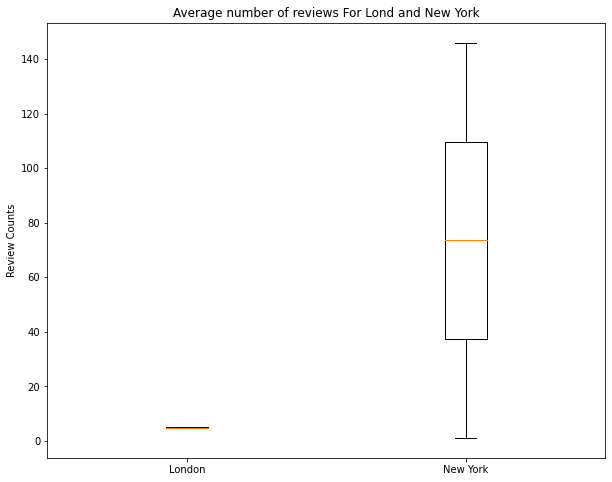

In [84]:
#Box plot showing the mean review counts by the number of ratings for each area 
fig, ax = plt.subplots(figsize = (10,8))

# Add data: "raitng", "review count" from the dataframe
ax.boxplot([avgR['rating'], avgR['review_count']])


# Set the x-axis label to "London and New York"
ax.set_xticklabels(['London', "New York"])

# Set the y-axis label to "Review Counts"
ax.set_ylabel("Review Counts")

#set the title for the boxplot
ax.set_title('Average number of reviews For Lond and New York')


plt.show()

In [85]:
#Creates a query the prices for each areas in NYC

cur.execute("""
SELECT price, city, review_count
FROM businesses 
WHERE price = '$$$$' OR price = '$$$' OR price = '$$' OR price = '$'
""")
priceNYCdb = pd.DataFrame(cur.fetchall())
priceNYCdb.columns = [x[0] for x in cur.description]
priceNYCdb

,price,city,review_count
0,$$,New York,10
1,$$,New York,1
2,$$,Jersey City,40
3,$$$,New York,269
4,$$$,Guttenberg,38
...,...,...,...
93,$$,Jersey City,14
94,$$$,New York,148
95,$$$,New York,105
96,$$$,New York,76


In [47]:
# Replaces all the $ with 1 through 4 value for leas tto most epxensive 
newcolumn = []

for x in priceNYCdb['price']:
    if x == '$':
        newcolumn.append(int(x.replace('$', str(1))))
    if x == '$$':
        newcolumn.append(int(x.replace('$$', str(2))))
    if x == '$$$':
        newcolumn.append(int(x.replace('$$$', str(3))))
    if x == '$$$$':
        newcolumn.append(int(x.replace('$$$$', str(4))))

In [48]:
#Adds the new column for the conversion of the symbol to the numeric value 
priceNYCdb['newPrice'] = newcolumn

In [49]:
#Creates a query the prices for each areas in Lodnon
cur.execute("""
SELECT price, city, review_count
FROM businesses 
WHERE price = '££££' OR price = '£££' OR price = '££' OR price = '£'

""")
priceUKdb = pd.DataFrame(cur.fetchall())
priceUKdb.columns = [x[0] for x in cur.description]
priceUKdb

,price,city,review_count
0,££,London,8
1,£££,London,7
2,£££,Soho,15
3,££,London,5
4,£££,London,2
5,££,London,6
6,££££,London,7
7,£££,London,4
8,££,London,2
9,££££,London,2


In [50]:
# Replaces all the £ with 1 through 4 value for leas tto most epxensive 


newcolumnUK = []

for x in priceUKdb['price']:
    if x == '£':
        newcolumnUK.append(int(x.replace('£', str(1))))
    if x == '££':
        newcolumnUK.append(int(x.replace('££', str(2))))
    if x == '£££':
        newcolumnUK.append(int(x.replace('£££', str(3))))
    if x == '££££':
        newcolumnUK.append(int(x.replace('££££', str(4))))

In [77]:
#Adds the new column to the london database
priceUKdb['newPrice'] = newcolumnUK 

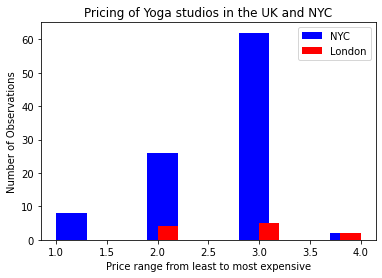

In [52]:
#Hsitogram of the fo

fig, ax = plt.subplots()
# Plot a histogram of "Price" for each NYC 
ax.hist(priceNYCdb['newPrice'], label = 'NYC',  color = 'blue')

# Compare to histogram of "Price" for London
ax.hist(priceUKdb['newPrice'], label= 'London', color = 'red')

# Set the x-axis label to "Price Range for Yoga studios"
ax.set_xlabel('Price range from least to most expensive')

# Set the y-axis label to "# of observations"
ax.set_ylabel('Number of Observations')
#Title for the our histogram 
ax.set_title('Pricing of Yoga studios in the UK and NYC')

#Creates the legend to identify what color is for what location 
ax.legend()
plt.show()

In [44]:
business_df = business


Brooklyn_zip_codes = [11212, 11213, 11216, 11233, 11238,
11209, 11214, 11228,
11204, 11218, 11219, 11230,
11234, 11236, 11239,
11223, 11224, 11229, 11235,
11201, 11205, 11215, 11217, 11231,
11203, 11210, 11225, 11226,
11207, 11208,
11211, 11222,
11220, 11232,
11206, 11221, 11237]

Brooklyn_zip_codes = list(map(str,Brooklyn_zip_codes))
Brooklyn_filter = business_df['zip_code'].isin(Brooklyn_zip_codes)

# creating the dataset
reviews_made = list(business_df[Brooklyn_filter].groupby('zip_code')['review_count'].count())
bk_zip_codes = list(business_df[Brooklyn_filter].groupby('zip_code')['review_count'].count().index)

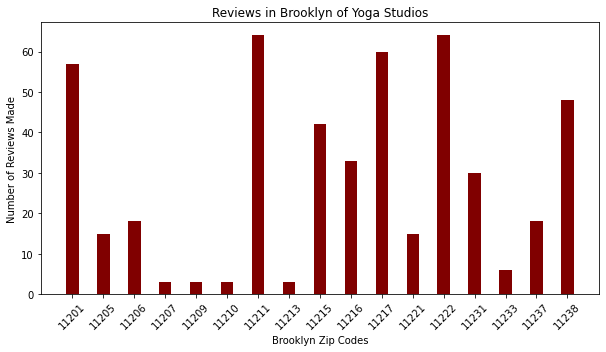

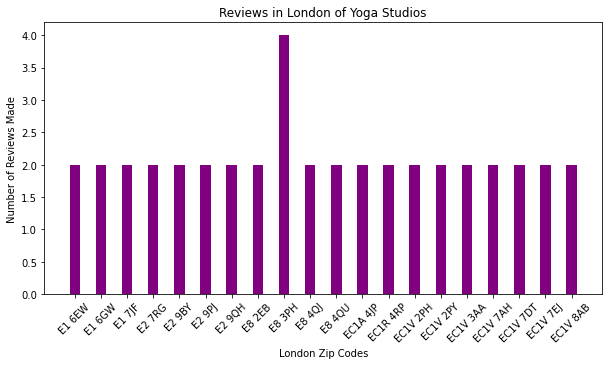

In [48]:
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(bk_zip_codes, reviews_made, color ='maroon', width = 0.4)
plt.xticks(rotation=45)
plt.xlabel("Brooklyn Zip Codes")
plt.ylabel("Number of Reviews Made")
plt.title("Reviews in Brooklyn of Yoga Studios")
plt.show()
fig.savefig('Reviews_in_Brooklyn_of_Yoga_Studios.png')






London_filter = business_df['country'] == 'GB'
business_df[London_filter]
business_df[London_filter].groupby('zip_code')['review_count'].count()[:20]

# creating the dataset
reviews_made = list(business_df[London_filter].groupby('zip_code')['review_count'].count()[:20]
)
London_zip_codes = list(business_df[London_filter].groupby('zip_code')['review_count'].count()[:20].index)
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(London_zip_codes, reviews_made, color ='purple', width = 0.4)
plt.xticks(rotation=45)
plt.xlabel("London Zip Codes")
plt.ylabel("Number of Reviews Made")
plt.title("Reviews in London of Yoga Studios")
fig.savefig('Reviews_in_London_of_Yoga_Studios.png')
plt.show()